# Computing InChIs

```{dropdown} About this interactive ![icons](../static/img/rocket.png) recipe
- Author: [Vincent Scalfani](https://orcid.org/0000-0002-7363-531X)
- Reviewer: [Stuart Chalk](https://orcid.org/0000-0002-0703-7776)
- Topics: How to Calculate InChIs from SMILES, Using [RDKit](https://www.rdkit.org/) or [Open Babel](https://openbabel.org/wiki/Main_Page)
  *Adapted from CPCDS 2021 Digital IUPAC Session - 51st IUPAC General Assembly*
- Format: Interactive Jupyter Notebook (Python)
- Scenarios:
- Skills: You should be familiar with
    - [Chemical Identifiers](https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2015)%3A_Chem_4399_5399/Text/5_Chemical_Identifiers)
- Learning outcomes:  After completing this example you should understand:
    -  How to load and use RDKit to obtain and display chemical identifiers
    -  How to load and use Open Babel to obtain and display chemical identifiers
- Citation: We will not be providing citations for the sampler, but citations for recipes will be available (with copy button) in the full release of the Cookbook and will include DOI’s.
- Reuse: This notebook is made available under a [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/) license.
```

## 1. Using RDKit
### 1.1 Import RDKit Modules

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

### 1.2 Create a Molecular Object from SMILES

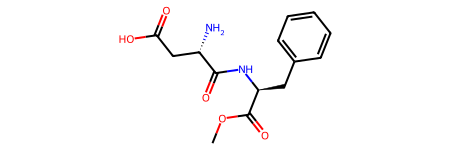

In [2]:
# PubChem CID: 134601
m = Chem.MolFromSmiles('COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(=O)O)N')
m # to show image of molecule

In [3]:
# Internally, we have created an RDKit molecular object
print(m)

### 1.3 Calculate InChI

In [4]:
# Compute InChI from RDKit mol
Chem.MolToInchi(m)

'InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m0/s1'

In [5]:
# Compute InChIKey from RDKit mol
Chem.MolToInchiKey(m)

'IAOZJIPTCAWIRG-QWRGUYRKSA-N'

### 1.4 Calculate InChIs for a List of Molecules

In [6]:
# Import a file of SMILES strings
smiles_list = []
with open('../files/my_smiles.smi') as infile:
     for smi in infile:
            smiles_list.append(smi.rstrip()) # rstrip removes newline
print(smiles_list)

['COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(=O)O)N', 'COC(=O)[C@@H](CC1=CC=CC=C1)NC(=O)[C@@H](CC(=O)O)N', 'COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C[C@@H](C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)NC(=O)[C@H](CC(=O)O)NC=O', 'C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)N', 'CC(C)C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)NC(=O)C']


In [7]:
# Or create a list directly
smiles_list = ['COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(=O)O)N',
               'COC(=O)[C@@H](CC1=CC=CC=C1)NC(=O)[C@@H](CC(=O)O)N',
               'COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C[C@@H](C(=O)O)N',
               'C1=CC=C(C=C1)C[C@@H](C(=O)O)NC(=O)[C@H](CC(=O)O)NC=O',
               'C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)N',
               'CC(C)C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)NC(=O)C']

In [8]:
# Next, loop through the smiles_list and create RDKit molecular objects
mols = []
for smi in smiles_list:
    mols.append(Chem.MolFromSmiles(smi))
    
print(mols)
# alternative solution
# mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

[<rdkit.Chem.rdchem.Mol object at 0x11b8545f0>, <rdkit.Chem.rdchem.Mol object at 0x11b8549e0>, <rdkit.Chem.rdchem.Mol object at 0x11b854e40>, <rdkit.Chem.rdchem.Mol object at 0x11b854eb0>, <rdkit.Chem.rdchem.Mol object at 0x11b854f20>, <rdkit.Chem.rdchem.Mol object at 0x11b854f90>]


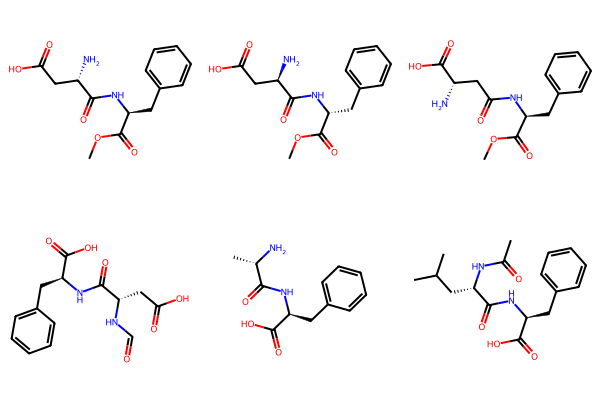

In [9]:
# Display the molecules in a grid
# SVG False uses PNG
Draw.MolsToGridImage(mols, molsPerRow=3, useSVG=False)

In [10]:
# Loop through mols (molecular objects) and calculate InChIs
InChIs = [Chem.MolToInchi(mol) for mol in mols]
print(InChIs)

['InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m0/s1', 'InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m1/s1', 'InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-12(17)8-10(15)13(18)19/h2-6,10-11H,7-8,15H2,1H3,(H,16,17)(H,18,19)/t10-,11-/m0/s1', 'InChI=1S/C14H16N2O6/c17-8-15-10(7-12(18)19)13(20)16-11(14(21)22)6-9-4-2-1-3-5-9/h1-5,8,10-11H,6-7H2,(H,15,17)(H,16,20)(H,18,19)(H,21,22)/t10-,11-/m0/s1', 'InChI=1S/C12H16N2O3/c1-8(13)11(15)14-10(12(16)17)7-9-5-3-2-4-6-9/h2-6,8,10H,7,13H2,1H3,(H,14,15)(H,16,17)/t8-,10-/m0/s1', 'InChI=1S/C17H24N2O4/c1-11(2)9-14(18-12(3)20)16(21)19-15(17(22)23)10-13-7-5-4-6-8-13/h4-8,11,14-15H,9-10H2,1-3H3,(H,18,20)(H,19,21)(H,22,23)/t14-,15-/m0/s1']


## 2. Using Open Babel
### 2.1 Import Open Babel Modules

In [11]:
# Open Babel v3.1.1
from openbabel import pybel

### 2.2 Create a Molecular Object from SMILES

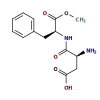

In [12]:
m = pybel.readstring("smi", "COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(=O)O)N")
m # to show image of molecule

In [13]:
# Internally, we have created an Open Babel molecular object
print(type(m))

<class 'openbabel.pybel.Molecule'>


### 2.3 Calculate InChI

In [14]:
# Set up InChI conversion
conv = pybel.ob.OBConversion()
conv.SetOutFormat("inchi")

True

In [15]:
# Calculate InChI
inchi_output = conv.WriteString(m.OBMol)
print(inchi_output)

InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m0/s1


In [16]:
# Set up InChIKey conversion
conv = pybel.ob.OBConversion()
conv.SetOutFormat("inchikey")

True

In [17]:
# Calculate InChIKey
inchikey_output = conv.WriteString(m.OBMol)
print(inchikey_output)

IAOZJIPTCAWIRG-QWRGUYRKSA-N


### 2.4 Calculate InChIs for a List of Molecules

In [18]:
# Import a file of SMILES
smiles_list =[]
with open('../files/my_smiles.smi') as infile:
     for smi in infile:
            smiles_list.append(smi.rstrip()) # rstrip removes newline
print(smiles_list)

['COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(=O)O)N', 'COC(=O)[C@@H](CC1=CC=CC=C1)NC(=O)[C@@H](CC(=O)O)N', 'COC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C[C@@H](C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)NC(=O)[C@H](CC(=O)O)NC=O', 'C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)N', 'CC(C)C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)O)NC(=O)C']


In [19]:
# Next,loop through the smiles_list and create OB molecular objects
ms = [pybel.readstring("smi", m) for m in smiles_list]
print(ms)

[<openbabel.pybel.Molecule object at 0x11b8762d0>, <openbabel.pybel.Molecule object at 0x11b874fd0>, <openbabel.pybel.Molecule object at 0x11b876850>, <openbabel.pybel.Molecule object at 0x11b876350>, <openbabel.pybel.Molecule object at 0x11b875c10>, <openbabel.pybel.Molecule object at 0x12ab27350>]


In [20]:
# Set up InChI conversion
conv = pybel.ob.OBConversion()
conv.SetOutFormat("inchi")

# Loop through mols (molecular objects) and calculate InChIs
InChIs = [conv.WriteString(m.OBMol).rstrip() for m in ms]
print(InChIs)

['InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m0/s1', 'InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-13(19)10(15)8-12(17)18/h2-6,10-11H,7-8,15H2,1H3,(H,16,19)(H,17,18)/t10-,11-/m1/s1', 'InChI=1S/C14H18N2O5/c1-21-14(20)11(7-9-5-3-2-4-6-9)16-12(17)8-10(15)13(18)19/h2-6,10-11H,7-8,15H2,1H3,(H,16,17)(H,18,19)/t10-,11-/m0/s1', 'InChI=1S/C14H16N2O6/c17-8-15-10(7-12(18)19)13(20)16-11(14(21)22)6-9-4-2-1-3-5-9/h1-5,8,10-11H,6-7H2,(H,15,17)(H,16,20)(H,18,19)(H,21,22)/t10-,11-/m0/s1', 'InChI=1S/C12H16N2O3/c1-8(13)11(15)14-10(12(16)17)7-9-5-3-2-4-6-9/h2-6,8,10H,7,13H2,1H3,(H,14,15)(H,16,17)/t8-,10-/m0/s1', 'InChI=1S/C17H24N2O4/c1-11(2)9-14(18-12(3)20)16(21)19-15(17(22)23)10-13-7-5-4-6-8-13/h4-8,11,14-15H,9-10H2,1-3H3,(H,18,20)(H,19,21)(H,22,23)/t14-,15-/m0/s1']


**References**

[1] RDKit Documentation: https://www.rdkit.org/docs/index.html

[2] Open Babel Python Documentation: https://open-babel.readthedocs.io/en/latest/UseTheLibrary/Python.html